## Library yang akan digunakan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [23]:
df = pd.read_csv('burgerking.csv')

## 1. BUSINESS UNDERSTANDING

Restoran burger King memiliki berbagai macam menu dengan kandungan lemak seperti lemak jenuh maupun lemak trans tinggi yang dapat meningkatkan kadar kolesterol dalam darah. Dengan tercantumnya kandungan gizi sesuai perhitungan yang dilakukan oleh ahli diet di setiap menu burger king, apakah makanan-makanan ini dapat mempengaruhi asupan gizi yang dibutuhkan untuk tubuh. Bertujuan agar para pelanggan dapat lebih sadar akan apa yang mereka makan tanpa perlu khawatir dapat menyebabkan penyakit kronis, seperti gula dan karbohidrat (di konsumsi berlebihan) menyebabkan diabetes dan penumpukan lemak di sel tubuh.

- Dataset yang di ambil dari kaggle ini (https://www.kaggle.com/datasets/mattop/burger-king-menu-nutrition-data)

## 2. DATA UNDERSTANDING

Dari pengumpulan data yang telah diambil mengenai Menu nutrisi Burger king, terdapat 12 kolom yang berisi 2 kolom objek, 7 kolom int dan 3 kolom float. Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah. Berikut atribut-atribut nya :

0. Item = nama-nama menu burger king.
1. Category = berupa golongan dari menu burger king.
2. Calories = kalori yang ada di setiap menu burgerking, bermanfaat untuk memberikan energi bagi tubuh. Agar tubuh mendapatkan nutrisi, maka dari itu semua makanan mempunyai kalori tetapi tidak semua makanan mmenyebabkan kolesterol.
3. Fat_calories = Lemak kalori
4. Fat = Lemak, nutrisi yang terdapat dalam makanan.
5. Saturated_Fat (Lemak jenuh) = meningkatkan kadar kolesterol baik dalam darah
6. Trans_Fat (Lemak trans) = meningkatkan kadar kolesterol jahat dan menurunkan kadar kolesterol baik. Lemak ini 2x lipat lebih berbahaya dari lemak jenuh.
7. Cholesterol (Kolestrol) = zat lemak (lipid) yang dihasilkan oleh hati yang berasal dari makanan. Tubuh menghasilkan kolesterol untuk membentuk berbagai hormon dan zat-zat lain guna menunjang berbagai fungsi tubuh.
8. Sodium (Sodium) = Natrium, mineral penting yang diperlukan tubuh dalam jumlah kecil.
9. Total_Carb (Total karbohidrat) = sumber energi utuk mendukung aktivitas, namun tidak baik juga bila di konsumsi berlebihan.
10. Sugars (Gula) = jenis karbohidrat sederhana yang dapat menyebabkan kenaikan berat badan bila di makan berlebihan.
11. Protein (Protein) = nutrisi yang dapat memperbaiki jaringan tubuh yang rusak, namun jika asupan protein terlalu tinggi dapat menyebabkan tubuh lebih banyak membuang kalsium.

## Deskripsi dataset

In [24]:
df.head()

,Item,Category,Calories,Fat_Calories,Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Total_Carb,Sugars,Protein
0,Whopper® Sandwich,Burgers,660,360,40.0,12.0,1.5,90,980,49,11,28
1,Whopper® Sandwich with Cheese,Burgers,740,420,46.0,16.0,2.0,115,1340,50,11,32
2,Bacon & Cheese Whopper® Sandwich,Burgers,790,460,51.0,17.0,2.0,125,1560,50,11,35
3,Double Whopper® Sandwich,Burgers,900,520,58.0,20.0,3.0,175,1050,49,11,48
4,Double Whopper® Sandwich with Cheese,Burgers,980,580,64.0,24.0,3.0,195,1410,50,11,52


# DATA PREPARATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item           77 non-null     object 
 1   Category       77 non-null     object 
 2   Calories       77 non-null     int64  
 3   Fat_Calories   77 non-null     int64  
 4   Fat            77 non-null     float64
 5   Saturated_Fat  77 non-null     float64
 6   Trans_Fat      77 non-null     float64
 7   Cholesterol    77 non-null     int64  
 8   Sodium         77 non-null     int64  
 9   Total_Carb     77 non-null     int64  
 10  Sugars         77 non-null     int64  
 11  Protein        77 non-null     int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 7.3+ KB


## Mencari heatmap

<AxesSubplot:>

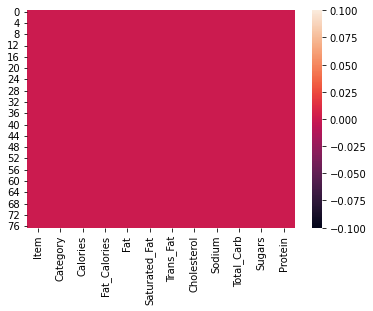

In [8]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [9]:
df.describe()

,Calories,Fat_Calories,Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Total_Carb,Sugars,Protein
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,501.428571,278.311688,30.967532,9.805195,0.636364,101.753247,993.246753,35.181818,6.636364,20.909091
std,307.612685,184.393762,20.535966,8.118431,1.128682,97.958659,613.426403,20.716588,6.973463,17.145033
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,260.000000,140.000000,16.000000,3.500000,0.000000,25.000000,470.000000,26.000000,1.000000,12.000000
50%,430.000000,250.000000,28.000000,8.000000,0.000000,70.000000,1010.000000,30.000000,6.000000,17.000000
75%,700.000000,380.000000,42.000000,14.000000,0.500000,175.000000,1420.000000,49.000000,10.000000,28.000000
max,1220.000000,750.000000,84.000000,33.000000,4.500000,390.000000,2840.000000,110.000000,40.000000,71.000000


## Visualisasi Data

<AxesSubplot:>

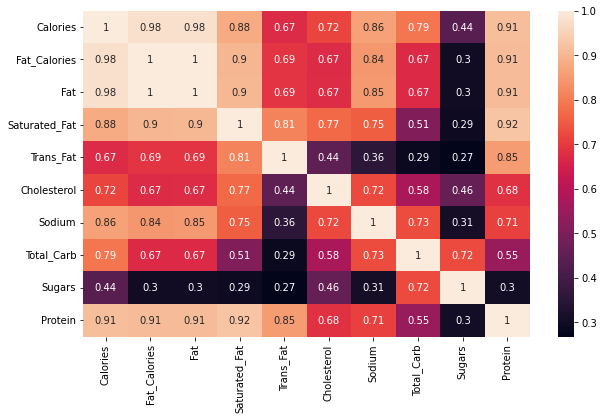

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## Jumlah Lemak Berdasarkan Menu Makanan

In [29]:
brands = df.groupby('Item').count()[['Cholesterol']].sort_values(by='Cholesterol', ascending=True).reset_index()
brands = brands.rename(columns={'Cholesterol':'Jumlah_Fat'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, 'American Cheese (slice)'),
  Text(1, 0, 'NY Ultimate Platter (Regional menu item)'),
  Text(2, 0, 'Mayonnaise (Packet)'),
  Text(3, 0, 'Ketchup (Packet)'),
  Text(4, 0, 'IMPOSSIBLE Whopper® Sandwich'),
  Text(5, 0, 'Honey Mustard Dipping Sauce (1oz)'),
  Text(6, 0, 'Hash Browns – small'),
  Text(7, 0, 'Original Chicken Sandwich'),
  Text(8, 0, 'Hash Browns – medium'),
  Text(9, 0, 'Ham, Egg, & Cheese Biscuit'),
  Text(10, 0, 'Fully Loaded CROISSAN’WICH®'),
  Text(11, 0, 'Fully Loaded Biscuit'),
  Text(12, 0, 'French Toast Sticks (5 piece)'),
  Text(13, 0, 'French Toast Sticks (3 piece)'),
  Text(14, 0, 'Extra Long Cheeseburger'),
  Text(15, 0, 

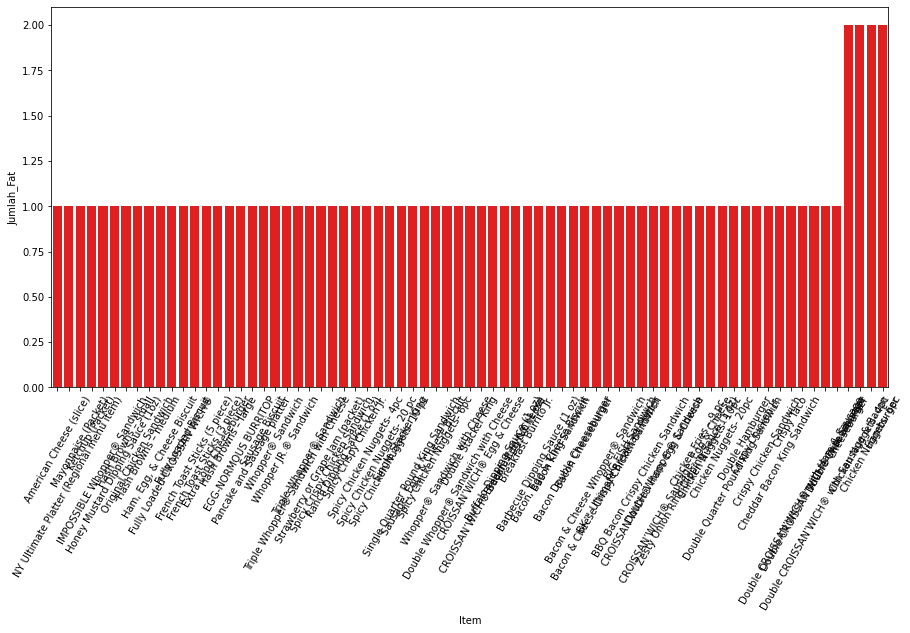

In [30]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['Item'], y = brands['Jumlah_Fat'], color = 'red')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [31]:
fitur = ['Calories', 'Saturated_Fat', 'Trans_Fat', 'Total_Carb', 'Sugars', 'Cholesterol']
x = df[fitur]
y = df['Fat']
x.shape, y.shape

((77, 6), (77,))

## Split Data Training & Testing

In [16]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(20,)

## membuat regresi linier

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [18]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9873131022908126


## Membuat inputan regresi linier

In [20]:
#Calories = 1190,  Saturated_Fat= 33, Trans_Fat = 3.5, Total_Carb = 50, Sugars = 11 ,  Cholesterol = 235
inputan = np.array([[1190, 33, 3.5, 50, 11, 235]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Lemak dalam Menu BurgerKing : ', prediksi)

Estimasi Jumlah Lemak dalam Menu BurgerKing :  [81.87407453]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

## Save Model

In [32]:
import pickle
filename = 'estimasi_lemak.sav'
pickle.dump(lr,open(filename,'wb'))